# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

# Add format specifier to both URLs
btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [5]:
# Get Content & Formatting for BTC
requests.get(btc_url)
response_data1 = requests.get(btc_url)
response_content1 = response_data1.content
data1 = response_data1.json()
print(json.dumps(data1, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18525862,
            "total_supply": 18525862,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 13119.68,
                    "volume_24h": 19470750116,
                    "market_cap": 242822597202,
                    "percentage_change_1h": 0.509887531616248,
                    "percentage_change_24h": 2.52070191268445,
                    "percentage_change_7d": 15.9074800610906,
                    "percent_change_1h": 0.509887531616248,
                    "percent_change_24h": 2.52070191268445,
                    "percent_change_7d": 15.9074800610906
                }
            },
            "last_updated": 1603561153
        }
    },
    "metadata": {
        "timestamp": 1603561153,
        "num_crypto

In [6]:
# # Get Content & Formatting for ETH
requests.get(eth_url)
response_data2 = requests.get(eth_url)
response_content2 = response_data2.content
data2 = response_data2.json()
print(json.dumps(data2, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 113140767,
            "total_supply": 113140767,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 413.83,
                    "volume_24h": 9374266403,
                    "market_cap": 46782281898,
                    "percentage_change_1h": 0.264832436054312,
                    "percentage_change_24h": 1.85195479373435,
                    "percentage_change_7d": 13.0719605221242,
                    "percent_change_1h": 0.264832436054312,
                    "percent_change_24h": 1.85195479373435,
                    "percent_change_7d": 13.0719605221242
                }
            },
            "last_updated": 1603561186
        }
    },
    "metadata": {
        "timestamp": 1603561186,
        "num_cryptoc

In [7]:
# Fetch current BTC price
btc_price = data1["data"]["1"]["quotes"]["USD"]["price"]
# Fetch current ETH price
eth_price = data2["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15743.62
The current value of your 5.3 ETH is $2193.30


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
my_spy = 50
my_agg = 200


In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-20", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Dropping time component of the date
df_portfolio.index = df_portfolio.index.date

# Preview DataFrame
df_portfolio

AGG                                      SPY                  \
             open    high     low   close   volume    open    high     low   
2020-10-20  117.7  117.71  117.58  117.64  3624855  343.46  346.88  342.64   

                              
             close    volume  
2020-10-20  343.34  48206853

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.64
Current SPY closing price: $343.34


In [12]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17167.00
The current value of your 200 AGG shares is $23528.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Set the data for the shares value DataFrame
value_data = {
    "amount":[my_btc_value+my_eth_value, my_agg_value+my_spy_value]
}
# Set Index
assets = ["crypto", "shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(value_data, index=assets)

# Display savings DataFrame
display(df_savings)

,amount
crypto,17936.915
shares,40695.000


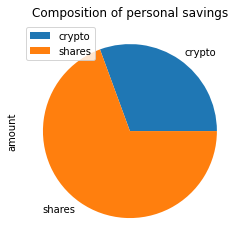

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of personal savings")

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = (my_btc_value+my_eth_value)+(my_agg_value+my_spy_value)


# Set the difference between emergency fund & total savings
savings_goal = emergency_fund - total_savings

# Validate saving health
if total_savings > emergency_fund:
    print("Congrats! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congrats! You have reached your financial goal.")
else:
    print(f"You need ${savings_goal} to reach your goal.")

Congrats! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_stocks = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    num_trading_days = 252*30
)

In [19]:
# Printing the simulation input data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995382,0.999089,0.993262,1.003503,1.002532,0.995309,1.007729,0.998895,1.003544,1.003558,...,0.995407,0.998690,0.995800,1.000286,0.997344,1.000346,1.006291,1.003590,0.998885,1.002386
2,0.995608,0.994295,0.985404,0.999263,0.998095,0.995433,1.002423,1.010590,1.002918,1.000647,...,1.001303,1.007602,1.000035,0.991238,0.997091,1.001563,1.010705,1.008810,1.006472,0.999213
3,0.988247,0.996655,0.992817,0.994745,0.992179,0.997583,1.001719,1.007709,0.997690,0.998821,...,1.008870,1.004956,1.011829,0.981723,0.991197,1.003812,1.000894,1.011529,1.000798,0.998739
4,0.973833,0.996088,0.994339,0.985499,0.987387,1.006205,1.003847,0.994111,1.003614,0.989110,...,1.013864,1.007737,1.008450,0.988065,0.999646,0.998934,1.003514,1.017160,1.006292,1.005808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.488749,3.639786,10.105191,13.754048,7.072159,5.558572,10.110689,3.650186,3.292673,7.152802,...,4.754550,8.265496,14.231301,6.032145,14.420233,1.604582,7.421587,6.723794,2.748506,5.409961
7557,4.503887,3.623756,10.100727,13.653901,7.035004,5.506618,10.182211,3.699156,3.318113,7.216272,...,4.706400,8.305631,14.177195,6.079663,14.473417,1.604073,7.379843,6.777848,2.729706,5.381338
7558,4.499646,3.608908,10.112623,13.650720,7.026877,5.519842,10.099404,3.717277,3.320098,7.167435,...,4.705827,8.277981,13.992032,6.125108,14.679801,1.611834,7.409947,6.764285,2.712257,5.361586
7559,4.448371,3.626275,10.160077,13.566110,6.991199,5.529747,10.097771,3.707442,3.294896,7.154903,...,4.724544,8.267553,13.977189,6.157735,14.673364,1.610652,7.373087,6.750333,2.701294,5.362631


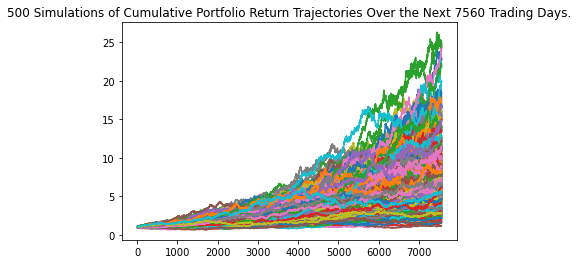

In [21]:
# Plot simulation outcomes
line_plot = mc_stocks.plot_simulation()

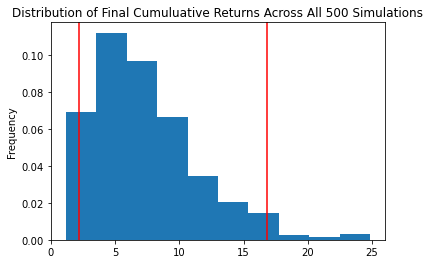

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = mc_stocks.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl = mc_stocks.summarize_cumulative_return()

# Print summary statistics
print(stocks_tbl)

count           500.000000
mean              7.396749
std               4.093031
min               1.153171
25%               4.420007
50%               6.435713
75%               9.407579
max              24.857351
95% CI Lower      2.204975
95% CI Upper     16.795356
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
stocks_ci_lower = round(stocks_tbl[8]*20000,2)
stocks_ci_upper = round(stocks_tbl[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${stocks_ci_lower} and ${stocks_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $44099.5 and $335907.12


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
stocks_ci_lower1 = round(stocks_tbl[8]*30000,2)
stocks_ci_upper1 = round(stocks_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${stocks_ci_lower1} and ${stocks_ci_upper1}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $66149.25 and $503860.68
